# Workshop on 3D sensor data representation and modelling

Course: Spatial Reasoning from Sensor Data

Website: https://www.iss.nus.edu.sg/executive-education/course/detail/spatial-reasoning-from-sensor--data/artificial-intelligence

Contact: Dr. Tian Jing

Email: tianjing@nus.edu.sg

## Objective
In this workshop, we will perform following tasks.
- Perform disparity estimation from stereo images
- Perform feature extraction and matching from multi-view images

## Submission guideline
Once you finish the workshop, rename your .ipynb file to your name, and submit your .ipynb file into LumiNUS.


In [12]:
# IMPORTANT: Upgrade the Opencv in Colab (from v4.1 to be v4.3) so that we can use SIFT feature
!pip install opencv-contrib-python==4.3.0.36


In [13]:
# Grant access to google drive.
# Run this cell, then you’ll see a link, click on that link, allow access
# Copy the code that pops up, paste it in the box, hit Enter

from google.colab import drive
drive.mount('/content/gdrive')

# Change working directory to be current folder, please keep ''/content/gdrive/My Drive/XXX' in the path and change XXX to be your own folder.
# The path is case sensitive.
import os
os.chdir('/content/gdrive/MyDrive/iss/SRSD/reconstruction')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
data


In [14]:
# Load necessary packages
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
print(cv2.__version__)

4.3.0


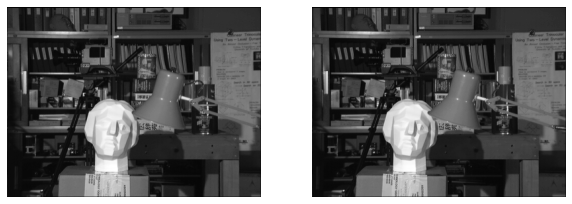

In [15]:
# Load the left and right images in gray scale
# Middlebury Stereo Vision Dataset, http://vision.middlebury.edu/stereo/data/scenes2001/
imgLeft = cv2.imread('data/tsukuba1.png', 0)
imgRight = cv2.imread('data/tsukuba2.png', 0)

# Display two input images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(imgLeft, 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(imgRight, 'gray')
plt.axis('off')
plt.show()


# Exercise 1: Disparity estimation from stereo image

- Reference: https://docs.opencv.org/3.4/d9/dba/classcv_1_1StereoBM.html

- Parameters
    - `numDisparities`: The disparity search range. For each pixel algorithm will find the best disparity from 0 (default minimum disparity) to numDisparities. The search range can then be shifted by changing the minimum disparity.
    - `blockSize`: The linear size of the blocks compared by the algorithm. The size should be odd (as the block is centered at the current pixel). Larger block size implies smoother, though less accurate disparity map. Smaller block size gives more detailed disparity map, but there is higher chance for algorithm to find a wrong correspondence.

In [16]:
# Calculate and show disparity

def ShowDisparity(bSize=5):
    # Initialize the stereo block matching object 
    stereo = cv2.StereoBM_create(numDisparities=32, blockSize=bSize)

    # Compute the disparity image
    disparity = stereo.compute(imgLeft, imgRight)

    # Normalize the image for representation
    min = disparity.min()
    max = disparity.max()
    disparity = np.uint8(255 * (disparity - min) / (max - min))
    
    #Plot the result
    return disparity


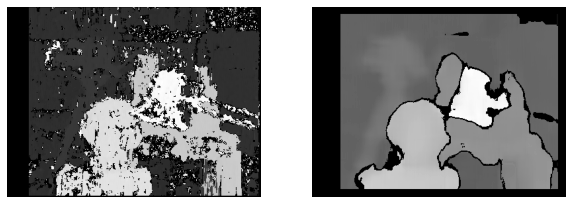

In [17]:
# Perform depth estimation and compare the performance using different block size bSize
# Note: the window size `bSize` should be odd number

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
result = ShowDisparity(bSize=5)
plt.imshow(result, 'gray')
plt.axis('off')
plt.subplot(1,2,2)
result = ShowDisparity(bSize=25)
plt.imshow(result, 'gray')
plt.axis('off')
plt.show()

# Exercise 2: Feature extraction and matching


In [18]:
def ShowKeypoints(image_name_1,image_name_2):

  # Step 1: Load two images as gray images
  image1 = cv2.imread(image_name_1, 0)
  image2 = cv2.imread(image_name_2, 0)

  # Display traning two images
  plt.figure(figsize=(20,8))
  plt.subplot(1,2,1)
  plt.imshow(image1,'gray')
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(image2,'gray')
  plt.axis('off')
  plt.show()

  # Step 2: Define feature extraction method, and perform detection and extraction
  # Use SIFT method
  sift = cv2.xfeatures2d.SIFT_create(100)

  image1_keypoints, image1_descriptor = sift.detectAndCompute(image1, None)
  image2_keypoints, image2_descriptor = sift.detectAndCompute(image2, None)

  print('image1: %d points detected' % len(image1_keypoints))
  print('image2: %d points detected' % len(image2_keypoints))

  # # Illustrate detected point and scale overlayed on the image

  # image1_bk = np.copy(image1)
  # image2_bk = np.copy(image2)

  # image1_bk = cv2.drawKeypoints(image1, image1_keypoints, image1_bk, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  # image2_bk = cv2.drawKeypoints(image2, image2_keypoints, image2_bk, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

  # plt.figure(figsize=(20,20))
  # plt.subplot(2,1,1)
  # plt.imshow(image1_bk)
  # plt.axis('off')
  # plt.subplot(2,1,2)
  # plt.imshow(image2_bk)
  # plt.axis('off')
  # plt.show()

  # Step3: Create a matcher and perform feature matching
  bf = cv2.BFMatcher()
  # Return k=2 best matches for each descriptor from a query set
  matches = bf.knnMatch(image1_descriptor, image2_descriptor, k=2)

  # Apply ratio test
  # Be careful at the good_matches and drawing, 
  # see https://stackoverflow.com/questions/48063525/error-with-matches1to2-with-opencv-sift
  good_matches = []
  thre_ratio = 0.75
  for m, n in matches:
      if m.distance < thre_ratio*n.distance:
          good_matches.append(m)
          
  # Print total number of matching points between the training and query images
  print("Number of good matchings: %d with threshold %.2f" % (len(good_matches), thre_ratio))

  result = cv2.drawMatches(image1, image1_keypoints, image2, image2_keypoints, good_matches, image2, flags = 2)

  # Step4: Display the best matching points
  plt.figure(figsize=(20,8))
  plt.title('Best Matching Points')
  plt.imshow(result)
  plt.axis('off')
  plt.show()

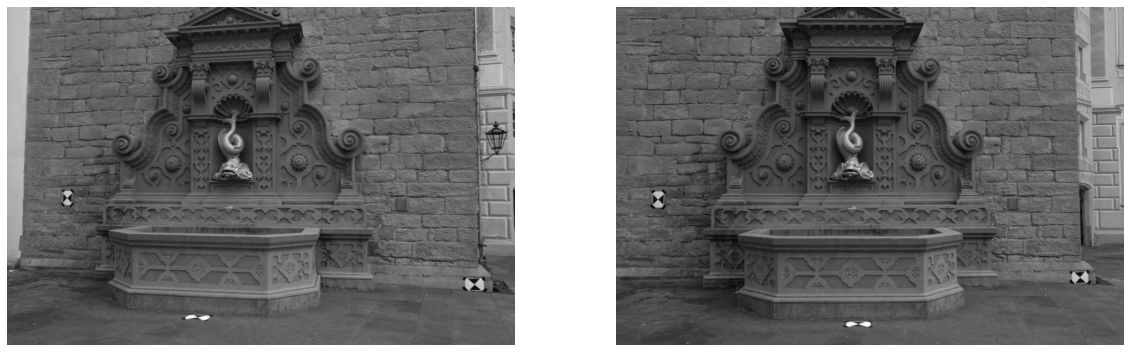

image1: 100 points detected
image2: 100 points detected
Number of good matchings: 47 with threshold 0.75


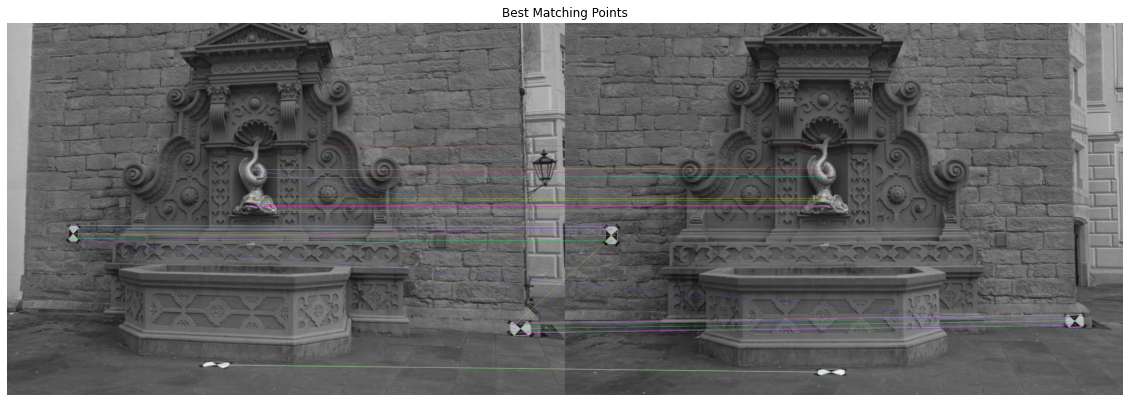

In [19]:
ShowKeypoints('data/fountain/0004.png','data/fountain/0005.png')

$\color{red}{\text{Q1. Apply your own chosen photos to perform SIFT feature extraction and matching}}$

Tasks
- Choose two images based on your interest, or download two images from https://github.com/openMVG/SfM_quality_evaluation
- Apply the `SIFT` feature extraction and matching method on these two images
- Illustrate the matched points of these two images


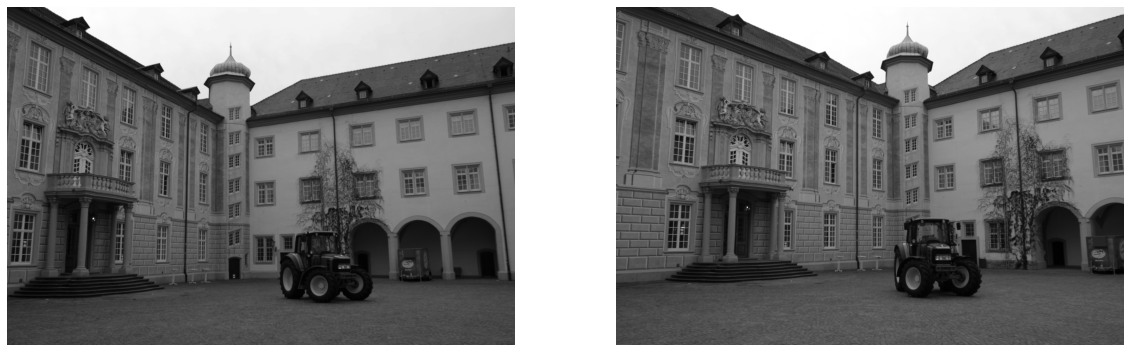

image1: 100 points detected
image2: 100 points detected
Number of good matchings: 36 with threshold 0.75


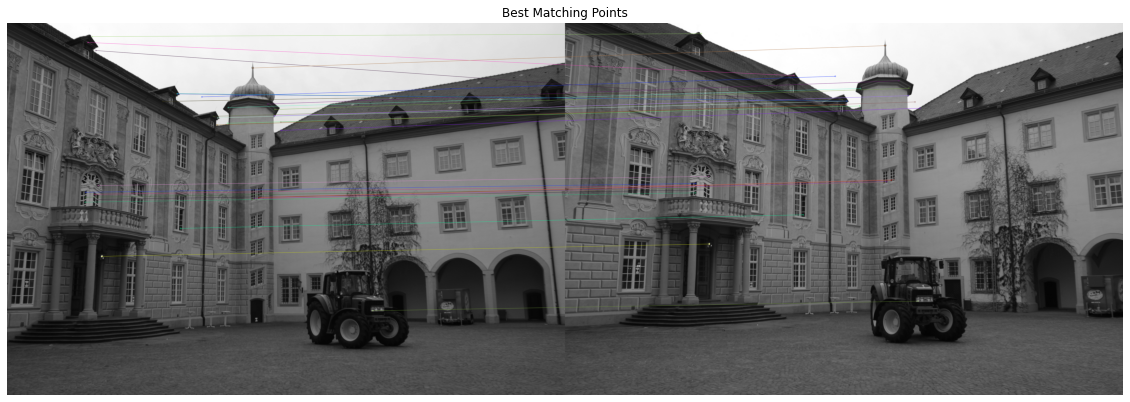

In [21]:
ShowKeypoints('data/castle/0001.jpg','data/castle/0002.jpg')

$\color{red}{\text{Q2. Given the matched pairs of points (obtained in the previous Q1) in these two images, what applications (use cases) can we further develop?}}$


In [ ]:
# Provide your answers to Q2 here.
# Panoramic Stitching - Since we have the matched keypoints, we can use affine transformation to stitch together the 2 images to create one.